# TASK 2 - analiza kolumn SEX, WEIGHT, SEATPOS, BODYTYPE oraz MAKE.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
occupants=pd.read_csv("occupants.csv")

In [78]:
vehicles=pd.read_csv("vehicles.csv")

In [79]:
n_wypadkow = accidents[["CASEID","PSU","YEAR"]].drop_duplicates(subset=["CASEID","PSU","YEAR"]).shape[0]
n_wypadkow

51978

In [119]:
n_poszkodowanych = occupants.shape[0]
n_poszkodowanych

110736

## KOLUMNA **SEX - płeć**

In [122]:
print(f" W kolumnie SEX {(occupants.SEX.isna().sum()/n_poszkodowanych):.2%} jest wartości NaN. ")
print(f" Przypadków NaN w kolumnie SEX jest {occupants.SEX.isna().sum()}.")

 W kolumnie SEX 1.50% jest wartości NaN. 
 Przypadków NaN w kolumnie SEX jest 1665.


In [129]:
occupants['SEX'].value_counts()

1.0    59498
2.0    48747
3.0      826
Name: SEX, dtype: int64

<AxesSubplot:>

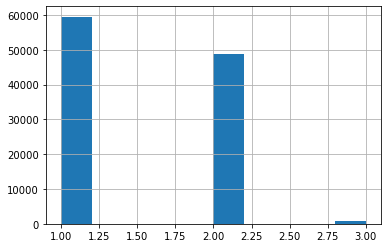

In [128]:
occupants['SEX'].hist()

In [124]:
wypadki_per_plec = occupants.groupby(["SEX"])['SEX'].count()/occupants.shape[0]
wypadki_per_plec 

SEX
1.0    0.537296
2.0    0.440209
3.0    0.007459
Name: SEX, dtype: float64

**W wypadkach większy udział odnotowano w przypadku mężczyzn (ok 54%), kobiety stanowity ok 46% (w tym ok 0,8% to kobiety w ciąży).**

In [86]:
wypadki_per_sex_role=occupants.groupby(["SEX",'ROLE'],dropna=False)['SEX'].apply(lambda occupants: occupants.count() / n_poszkodowanych).to_frame(name = 'count').reset_index()

In [87]:
wypadki_per_sex_role.sort_values(by="count", ascending = False).head()

,SEX,ROLE,count
0,1.0,1.0,0.379046
3,2.0,1.0,0.272721
4,2.0,2.0,0.167452
1,1.0,2.0,0.158178
6,3.0,1.0,0.004633


**Większa liczba mężczyzn kierowców (37,91%) niż kobiet kierowców (27,3%).** 

**Większa liczba kobiet jako pasażer (16,75%) niż mężczyzn (15,82%).**

## KOLUMNA **WEIGHT - waga**


In [88]:
print(f" W kolumnie WEIGHT {(occupants.WEIGHT.isna().sum()/n_poszkodowanych):.2%} jest wartości NaN. ")
print(f" Przypadków NaN w kolumnie WEIGHT jest {occupants.WEIGHT.isna().sum()}.")

 W kolumnie WEIGHT 34.50% przypadków to NaN 
 Przypadków NaN w WEIGHT jest 38202


In [90]:
occupants['WEIGHT'].value_counts()

4.0    27987
5.0    18833
3.0    13693
6.0     7350
1.0     2590
2.0     2081
Name: WEIGHT, dtype: int64

**Najwięcej pasażerów odnotowano w wadze 61-80 kg, potem 81-100 kg, następnie 41-60kg.**

<AxesSubplot:>

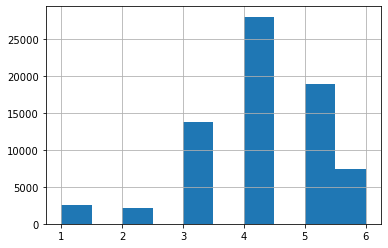

In [92]:
occupants['WEIGHT'].hist()

In [131]:
wypadki_per_waga = occupants.groupby(["WEIGHT"])['WEIGHT'].count()/occupants.shape[0]
wypadki_per_waga

WEIGHT
1.0    0.023389
2.0    0.018792
3.0    0.123654
4.0    0.252736
5.0    0.170071
6.0    0.066374
Name: WEIGHT, dtype: float64

**Największa ilość (25,73%) osób o wadze 61-80 kg, następnie 81-100 kg (17,00%), 41-60 kg (12,37%).**

## KOLUMNA **SEATPOS - pozycja siedzenia pasażera**


In [93]:
print(f" W kolumnie SEATPOS {(occupants.SEATPOS.isna().sum()/n_poszkodowanych):.2%} jest wartości NaN. ")
print(f" Przypadków NaN w kolumnie SEATPOS jest {occupants.SEATPOS.isna().sum()}.")

 W kolumnie SEATPOS 10.96% przypadków to NaN 
 Przypadków NaN w SEATPOS jest 12139


In [95]:
occupants['SEATPOS'].value_counts()

1.0    84388
2.0    13053
3.0      905
4.0      251
Name: SEATPOS, dtype: int64

<AxesSubplot:>

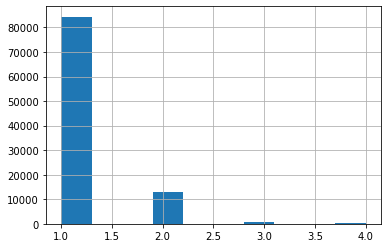

In [115]:
occupants['SEATPOS'].hist()

**Najwięcej odnotowano miejsc w pierwszym rzędzie, następnie w drugim i trzecim.**

In [132]:
wypadki_per_pozycja = occupants.groupby(["SEATPOS"])['SEATPOS'].count()/occupants.shape[0]
wypadki_per_pozycja 

SEATPOS
1.0    0.762065
2.0    0.117875
3.0    0.008173
4.0    0.002267
Name: SEATPOS, dtype: float64

**76,21% to pozycja z przodu obok kierowcy, 11.79% to pozycja w drugim rzędzie.**

In [149]:
wypadki_per_seatpos_role=occupants.groupby(["ROLE",'SEATPOS'],dropna=False)['ROLE'].apply(lambda occupants: occupants.count() / n_poszkodowanych).to_frame(name = 'count').reset_index()

In [144]:
wypadki_per_seatpos_role

,ROLE,SEATPOS,count
0,1.0,1.0,0.591777
1,1.0,2.0,0.000027
2,1.0,NaN,0.069047
3,2.0,1.0,0.170288
4,2.0,2.0,0.117848
5,2.0,3.0,0.008173
6,2.0,4.0,0.002240
7,2.0,NaN,0.040321
8,NaN,4.0,0.000000
9,NaN,NaN,0.000000


**Największa liczba pasażerów siedziała w pierwszym rzędzie (17,03%), zaś w drugim rzędzie siedziało 11,79% pasażerów.**

## KOLUMNA **BODYTYPE - typ auta**

In [98]:
print(f" W kolumnie BODYTYPE {(vehicles.BODYTYPE.isna().sum()/n_poszkodowanych):.2%} jest wartości NaN. ")
print(f" Przypadków NaN w kolumnie w BODYTYPE jest {vehicles.BODYTYPE.isna().sum()}")

 W kolumnie BODYTYPE 0.17% przypadków to NaN 
 Przypadków NaN w BODYTYPE jest 193


In [100]:
vehicles['BODYTYPE'].value_counts()

0.0    55002
5.0    35604
4.0     1616
1.0     1332
2.0      584
3.0      157
6.0       55
Name: BODYTYPE, dtype: int64

<AxesSubplot:>

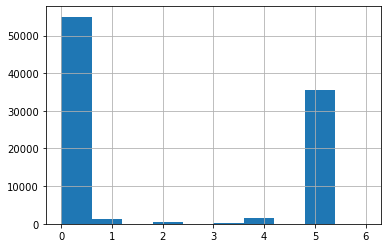

In [118]:
vehicles['BODYTYPE'].hist()

**Najwięcej jest aut typu osobowego, potem większe osobowe następnie motory i quady.**

In [150]:
wypadki_per_tauta = vehicles.groupby(["BODYTYPE"])['BODYTYPE'].count()/occupants.shape[0]
wypadki_per_tauta 

BODYTYPE
0.0    0.496695
1.0    0.012029
2.0    0.005274
3.0    0.001418
4.0    0.014593
5.0    0.321521
6.0    0.000497
Name: BODYTYPE, dtype: float64

**49,67% to auta osobowe biorące udział w wypadku, zaś 32,15% to większe samochody tj. suvy czy vany.**

## KOLUMNA **MAKE - marka auta**

In [103]:
print(f" W kolumnie MAKE {(vehicles.MAKE.isna().sum()/n_poszkodowanych):.2%} jest wartości NaN. ")
print(f" Przypadków NaN w kolumnie MAKE jest {vehicles.MAKE.isna().sum()}")

 W kolumnie MAKE 0.61% przypadków to NaN 
 Przypadków NaN w MAKE jest 676


In [153]:
vehicles['MAKE'].describe()

count    93867.000000
mean        28.393333
std         18.758576
min          1.000000
25%         12.000000
50%         21.000000
75%         41.000000
max         98.000000
Name: MAKE, dtype: float64

<AxesSubplot:>

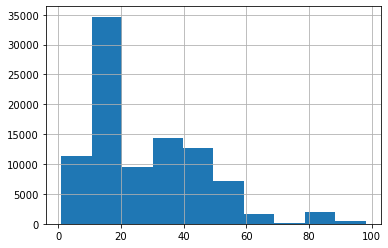

In [154]:
vehicles['MAKE'].hist()

**Najwięcej aut jest marki : Ford, Chevrolet, Eagle,Honda, Dodge.**

In [151]:
wypadki_per_marka_auta = vehicles.groupby(["MAKE"])['MAKE'].count()/occupants.shape[0]
wypadki_per_marka_auta 

MAKE
1.0     0.000054
2.0     0.024987
3.0     0.000596
6.0     0.019515
7.0     0.052106
          ...   
84.0    0.004895
85.0    0.002149
86.0    0.002249
87.0    0.002203
98.0    0.004145
Name: MAKE, Length: 63, dtype: float64

In [152]:
wypadki_per_marka_auta.sort_values(ascending=False)

MAKE
12.0    0.136767
20.0    0.124061
49.0    0.080426
37.0    0.064180
7.0     0.052106
          ...   
78.0    0.000018
31.0    0.000009
60.0    0.000009
71.0    0.000009
43.0    0.000009
Name: MAKE, Length: 63, dtype: float64

In [114]:
((wypadki_per_marka_auta.sort_values(ascending=False))[:10])

MAKE
12.0    0.136767
20.0    0.124061
49.0    0.080426
37.0    0.064180
7.0     0.052106
35.0    0.047004
22.0    0.027769
2.0     0.024987
23.0    0.021095
18.0    0.019705
6.0     0.019515
55.0    0.017284
14.0    0.014584
41.0    0.014458
30.0    0.013239
21.0    0.012245
52.0    0.011875
24.0    0.011704
63.0    0.011631
19.0    0.010322
59.0    0.009897
54.0    0.009798
34.0    0.009509
48.0    0.009103
42.0    0.008967
13.0    0.007568
51.0    0.006863
82.0    0.005924
9.0     0.005147
58.0    0.005030
84.0    0.004895
98.0    0.004145
53.0    0.003423
32.0    0.003414
38.0    0.003395
86.0    0.002249
87.0    0.002203
85.0    0.002149
62.0    0.001517
47.0    0.001436
39.0    0.001300
69.0    0.000939
45.0    0.000668
3.0     0.000596
64.0    0.000515
10.0    0.000397
Name: MAKE, dtype: float64

**Najwięcej wypadków miały marki : Ford 13,68%, Chevrolet 12,41%, Toyota 8,04%, Honda 6,42%, Dodge 5,21%.**

